# Credit_card

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**1. Загрузим датасет**

In [2]:
data = pd.read_csv('E:\\Георгий\\konspekty\\Python\\data\\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Набор данных содержит транзакции, совершенные европейскими держателями кредитных карт в сентябре 2013 года.
В этом наборе данных представлены транзакции, которые произошли за два дня, из которых у нас 492 мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, на положительный класс (мошенничество) приходится 0,172% всех транзакций.

Он содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью мы не можем предоставить исходные функции и дополнительную справочную информацию о данных. Характеристики V1, V2,… V28 - это основные компоненты, полученные с помощью PCA, единственными функциями, которые не были преобразованы с помощью PCA, являются «Время» и «Сумма». 


Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
    Количество секунд, прошедших между этой транзакцией и первой транзакцией в наборе данных

V1-V2: may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
    может быть результатом уменьшения размерности PCA для защиты идентификационных данных пользователей 
    и конфиденциальных функций (v1-v28)

Class: 1 - мошенническая транзакция, 0 - обычная


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**2. Посмотрим отсутствующие значения (какое количество Nan элементов).**

In [4]:
data.isna().sum().sum()

0

In [5]:
# Посмотрим по каждой колонке 
for col in data.columns:
    print(col, data[col].isin(["NA", "", None, np.NaN]).sum().sum())

Time 0
V1 0
V2 0
V3 0
V4 0
V5 0
V6 0
V7 0
V8 0
V9 0
V10 0
V11 0
V12 0
V13 0
V14 0
V15 0
V16 0
V17 0
V18 0
V19 0
V20 0
V21 0
V22 0
V23 0
V24 0
V25 0
V26 0
V27 0
V28 0
Amount 0
Class 0


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделаем график для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

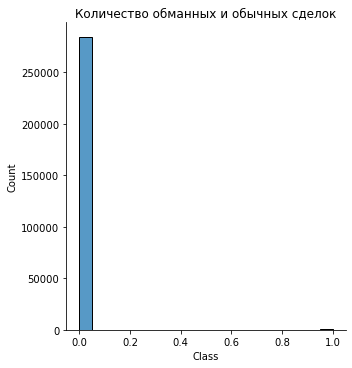

Количество обманных сделок: 492
Количество честных сделок: 284315


In [6]:
data_1 = data[data['Class'].isin([1,0])]

B = data_1['Class']
sns.displot(B)
plt.title('Количество обманных и обычных сделок')
plt.show()

print('Количество обманных сделок:',len(data[data['Class'] == 1]))
print('Количество честных сделок:',len(data[data['Class'] == 0]))

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделаем частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

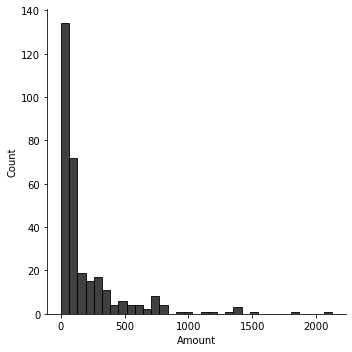

Общее количество денег использованных в обманных операциях:  60128.0


In [7]:
data_1_1 = data[data['Class'] == 1]
data_1_2 = data[data['Class'] == 0]

# т.к большее количество операций с amount = 0 и 1, для более качественной оценки 
sns.displot(data_1_1[data_1_1['Amount'] > 1]['Amount'], color= 'black')
plt.show()

print('Общее количество денег использованных в обманных операциях: ', round(sum(data_1_1['Amount']),1))

Основная часть показателя Amount собрана от 0 до 1000, также наблюдается небольшой подъем в районе 750 и 1400

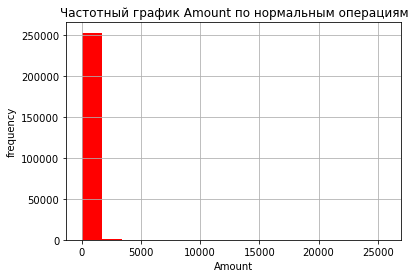

Общее количество денег использованных в нормальных операциях:  25102462.0


In [8]:
n, bins, patches = plt.hist(data_1_2[data_1_2['Amount'] > 1]['Amount'], 15, color= 'red')

plt.xlabel('Amount')
plt.ylabel('frequency')
plt.title('Частотный график Amount по нормальным операциям')
plt.grid(True)
plt.show()
print('Общее количество денег использованных в нормальных операциях: ', round(sum(data_1_2['Amount']),1))

Из графика видно, что основная часть обманных операций проводится в пределах Amount от 0 до примерно 1700. Характер распределения имеет значительное отличие пос сравнению с обманными

**5. Построим графики histograms для всех значений**

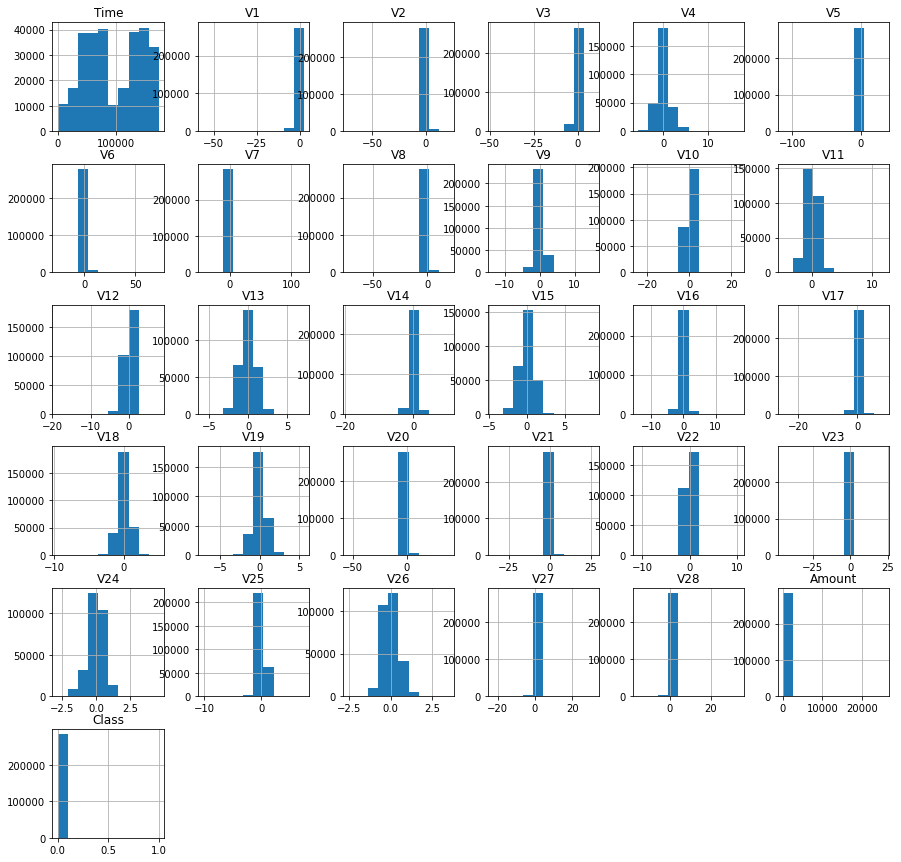

In [9]:
data.hist(figsize=(15,15))
plt.show()

**6. Построим матрицу корреляций для всех значений**

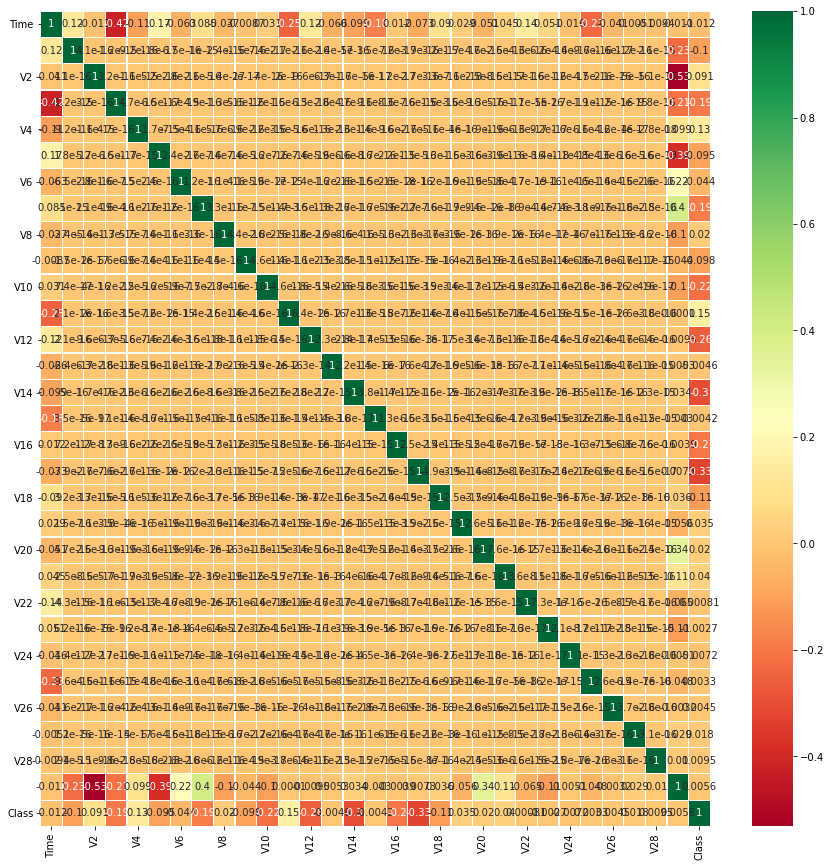

In [10]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

Наиболее коррелирующие V2 и Amount, V5 и  Amount, Time и V3. C Class относительно остальных данных более коррелируют  V10, V11, V12, V14,V16, V17

**Отрицательная корреляция:** V17, V14, V12, V10, V7, V3. Эти значения ниже - выше вероятность мошеннической транзакции

**Положительная корреляция:** V2, V4, V11. Эти значения выше - выше вероятность мошеннической транзакции


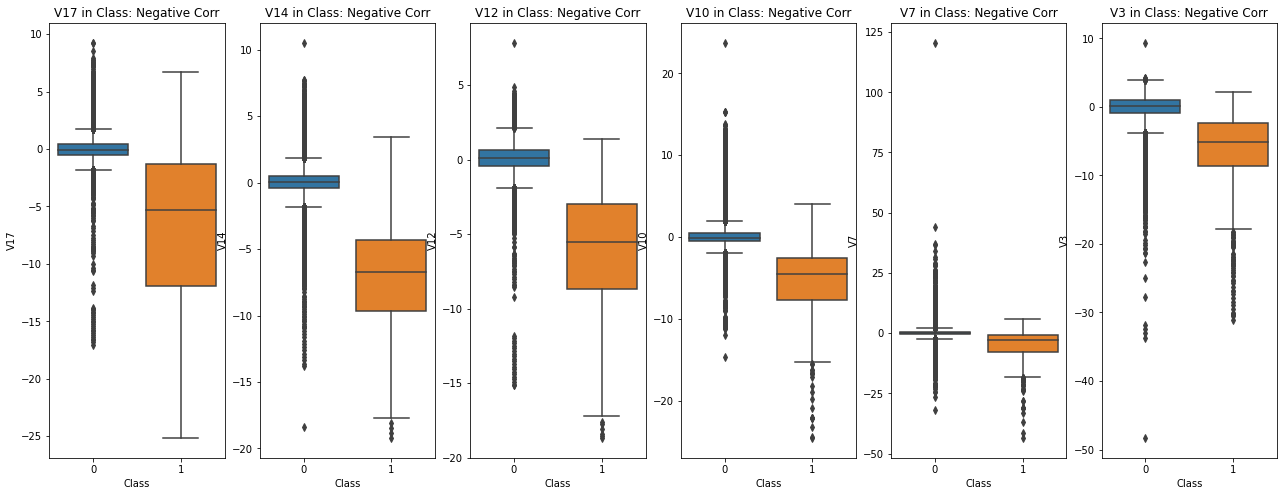

In [11]:
f, axes = plt.subplots(ncols=6, figsize=(22,8))

# Анализируем данные с отрицательной корреляцией 
sns.boxplot(x="Class", y="V17", data=data,  ax=axes[0])
axes[0].set_title('V17 in Class: Negative Corr')

sns.boxplot(x="Class", y="V14", data=data,  ax=axes[1])
axes[1].set_title('V14 in Class: Negative Corr')

sns.boxplot(x="Class", y="V12", data=data,  ax=axes[2])
axes[2].set_title('V12 in Class: Negative Corr')

sns.boxplot(x="Class", y="V10", data=data,  ax=axes[3])
axes[3].set_title('V10 in Class: Negative Corr')

sns.boxplot(x="Class", y="V7", data=data,  ax=axes[4])
axes[4].set_title('V7 in Class: Negative Corr')

sns.boxplot(x="Class", y="V3", data=data,  ax=axes[5])
axes[5].set_title('V3 in Class: Negative Corr')

plt.show()

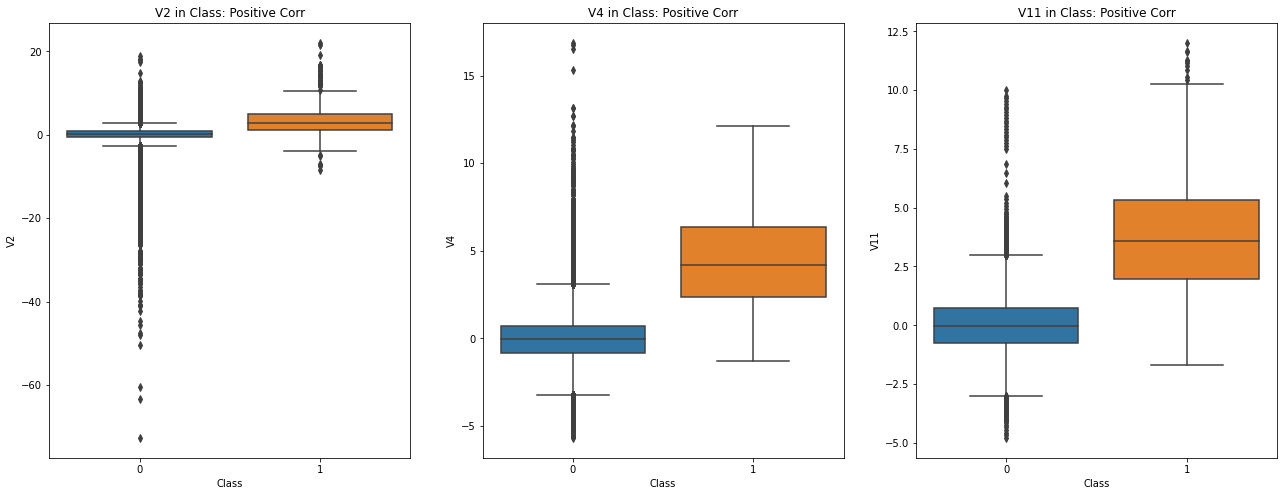

In [12]:
f, axes = plt.subplots(ncols=3, figsize=(22,8))

# Анализируем данные с отрицательной корреляцией 
sns.boxplot(x="Class", y="V2", data=data,  ax=axes[0])
axes[0].set_title('V2 in Class: Positive Corr')

sns.boxplot(x="Class", y="V4", data=data,  ax=axes[1])
axes[1].set_title('V4 in Class: Positive Corr')

sns.boxplot(x="Class", y="V11", data=data,  ax=axes[2])
axes[2].set_title('V11 in Class: Positive Corr')

plt.show()

In [13]:
# Смотрим выбросы по колонкам data, когда Class ==1 (мошенническая сделка)

for k, v in data[data['Class'] == 1].items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1 # интерквартильный размах
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)] #отнимаем 1.5 межквартильного размаха от 1 квартиля и прибавляем к 3-ему
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data[data['Class'] == 1])[0] # получаем только значения которые соответствуют выбросам 
        print("Выбросы колонки %s = %.2f%%" % (k, perc))# считаем относительный показатель по каждой колонке 
    

Выбросы колонки Time = 0.00%
Выбросы колонки V1 = 10.57%
Выбросы колонки V2 = 9.35%
Выбросы колонки V3 = 10.77%
Выбросы колонки V4 = 0.00%
Выбросы колонки V5 = 9.15%
Выбросы колонки V6 = 3.05%
Выбросы колонки V7 = 6.10%
Выбросы колонки V8 = 19.92%
Выбросы колонки V9 = 3.46%
Выбросы колонки V10 = 3.86%
Выбросы колонки V11 = 2.03%
Выбросы колонки V12 = 1.22%
Выбросы колонки V13 = 0.00%
Выбросы колонки V14 = 0.81%
Выбросы колонки V15 = 1.63%
Выбросы колонки V16 = 0.00%
Выбросы колонки V17 = 0.00%
Выбросы колонки V18 = 0.00%
Выбросы колонки V19 = 1.02%
Выбросы колонки V20 = 8.33%
Выбросы колонки V21 = 9.96%
Выбросы колонки V22 = 4.88%
Выбросы колонки V23 = 11.99%
Выбросы колонки V24 = 0.61%
Выбросы колонки V25 = 7.32%
Выбросы колонки V26 = 0.41%
Выбросы колонки V27 = 14.23%
Выбросы колонки V28 = 9.35%
Выбросы колонки Amount = 14.02%
Выбросы колонки Class = 100.00%


In [14]:
# Удалим данные выбросы - ориентируясь на колонки, которые наиболее коррелируют с Class
df_neww = data[data['Class'] == 1] 
data_new = data 
a = []

# Берём выбросы только по наиболее коррелирующим колонкам, по классу == 1: мошенническая сделка 
for k, v in df_neww[['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V2', 'V4', 'V11']].items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1 # интерквартильный размах
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)] #отнимаем 1.5 межквартильного размаха от 1 квартиля и прибавляем к 3-ему
        if len(v_col) > 0:
            for i in list(v_col.index):
                a.append(i)
data_new = data_new.drop(list(set(a))) # избавляемся от дублей и удаляем соответствующие индексы в датасете 


**7. Подготовим данные для обучения**

In [15]:
# Разбиваем на тестовую и обучающую выборку
from sklearn.model_selection import train_test_split
    
x = data_new.drop(["Class"], axis = 1)
y = data_new["Class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# under_sampling - балансируем представленные классы в обучающих данных  
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X_train, y_train)

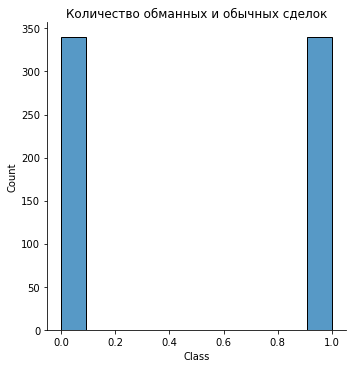

In [17]:
sns.displot(y_nm)
plt.title('Количество обманных и обычных сделок')
plt.show()

In [18]:
#Приведем данные к одному диапазону значений (-1,1)
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

X_st_sm_train = min_max_scaler.fit_transform(x_nm)
X_st_sm_test = min_max_scaler.fit_transform(X_test)

X_st_sm_train = pd.DataFrame(X_st_sm_train)
X_st_sm_test = pd.DataFrame(X_st_sm_test)

headers = list(data.drop(["Class"], axis = 1).columns.values)

X_st_sm_train.columns = headers
X_st_sm_test.columns = headers

Посмотрим насколько выделяются кластеры данных обманных и обычных сделок в данных. Воспользуемся методом t- STE Стохастическое вложение соседей с t-распределением

In [19]:
from sklearn.manifold import TSNE

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_st_sm_train.values)

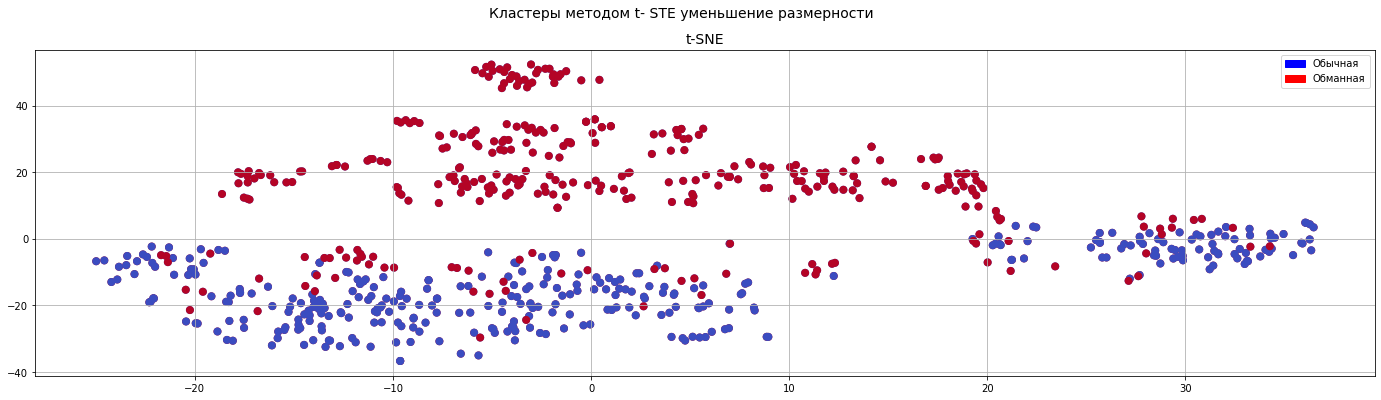

In [20]:
import matplotlib.patches as mpatches

# Визуализируем кластеры 

f, ax = plt.subplots(1, figsize=(24,6))
f.suptitle('Кластеры методом t- STE уменьшение размерности ', fontsize=14)


blue_patch = mpatches.Patch(color='blue', label='Обычная')
red_patch = mpatches.Patch(color='red', label='Обманная')

# t-SNE scatter plot
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_nm == 0), cmap='coolwarm', label='Обычная', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_nm== 1), cmap='coolwarm', label='Обманая', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


Кластеры обманных сделок на большей части участков значительно выделяются на фоне обычных. Значит есть возможность обучить качественную модель по выявлению обманных транзакций  

**8. Подберём модель для классификации** 

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(), 
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "Support Vector Classifier":SVC(), 
    "GaussianNB" : GaussianNB(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier()
}


acc = []
cv_scores = []
def model(name, model):
    print(name)
    model.fit(X_st_sm_train, y_nm)
    score = model.score(X_st_sm_train, y_nm)
    print("Accuracy: {}".format(score))
    cv_score = cross_val_score(model,X_st_sm_train, y_nm,cv=5)
    print("Cross Val Score: {}".format(np.mean(cv_score)))
    acc.append(score)
    cv_scores.append(np.mean(cv_score))
    

In [22]:
for name, clf in models.items():
    model(name,clf)

LogisiticRegression
Accuracy: 0.9426470588235294
Cross Val Score: 0.9367647058823529
RandomForestClassifier
Accuracy: 1.0
Cross Val Score: 0.9323529411764705
DecisionTreeClassifier
Accuracy: 1.0
Cross Val Score: 0.9044117647058825
KNeighborsClassifier
Accuracy: 0.9411764705882353
Cross Val Score: 0.9176470588235295
Support Vector Classifier
Accuracy: 0.9441176470588235
Cross Val Score: 0.9323529411764705
GaussianNB
Accuracy: 0.9294117647058824
Cross Val Score: 0.9294117647058823
AdaBoostClassifier
Accuracy: 1.0
Cross Val Score: 0.95
GradientBoostingClassifier
Accuracy: 1.0
Cross Val Score: 0.9470588235294117


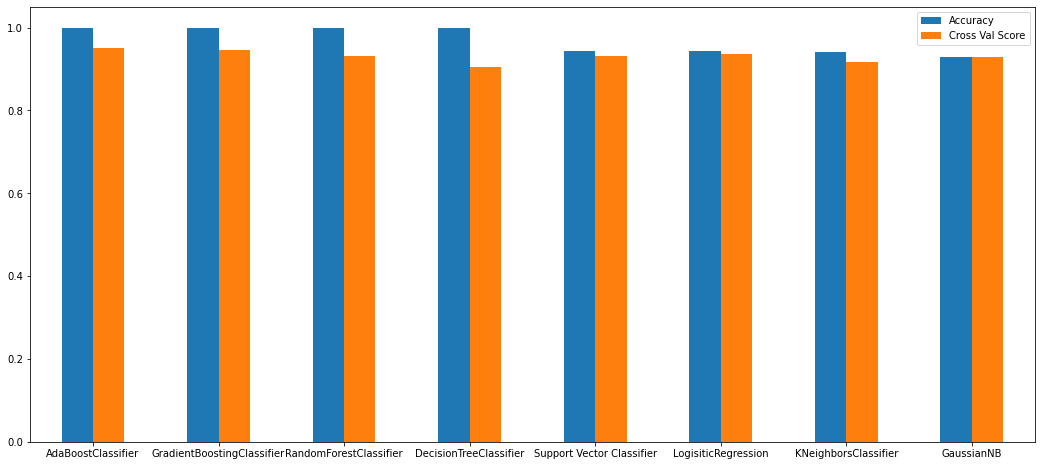

In [23]:
# Сравним качество моделей 
dff = pd.DataFrame({'Accuracy': acc,
                   'Cross Val Score': cv_scores}, index=list(models.keys()))

dff = dff.sort_values(by=['Accuracy','Cross Val Score'], ascending=False)
ax = dff.plot.bar(rot=0, figsize = (18,8))

In [24]:
# Оптимизируем лучшую модель 
model_final = AdaBoostClassifier()
model_final.fit(X_st_sm_train, y_nm)
y_predict = model_final.predict(X_st_sm_test)

#1 взять только наиболее коррелирующие параметры 
#2 обучить через up -sampling 
#3 Скорректировать модель
#4 Обучить нейросеть 

tn = ['0','1']
print(classification_report(y_test , y_predict , target_names=tn))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17     56875
           1       0.00      1.00      0.00        70

    accuracy                           0.09     56945
   macro avg       0.50      0.55      0.09     56945
weighted avg       1.00      0.09      0.17     56945



В данном случае точность определения класса 1 и полнота класса 0 практически = 0, изменим подход к обучению

**Дорабатываем модель** 

In [25]:
data_2 = data 

In [26]:
X = data_2.drop('Class', axis=1)
y = data_2['Class']

In [27]:
# нормализуем данные 

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

X = min_max_scaler.fit_transform(X)

X = pd.DataFrame(X)

headers = list(data_2.drop('Class', axis=1).columns.values)

X.columns = headers
X['Class'] = y
data_2 = X 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = data_2.drop('Class', axis=1)
y = data_2['Class']

# Выделим обучающие и тестовые данные(выборку валидации) для модели 

original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Перемешиваем данные в датасете 
df = data_2.sample(frac=1)

# Создаем 2 фрейма с мошенническими и не мошенническими классами 
fraud_df = df.loc[df['Class'] == 1] # Имеем 492 строки с мошенническими транзакциями 
non_fraud_df = df.loc[df['Class'] == 0][:492] # Возьмем аналогичное количество не мошеннических 

# Объединяем данные 
nm_df = pd.concat([fraud_df, non_fraud_df])

new_df = nm_df.sample(frac=1, random_state=42) # перемешиваем итоговую сбалансированную выборку 

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
117352,-0.136025,0.956046,0.513858,0.709421,-0.557479,0.511480,-0.475020,-0.483478,0.575619,-0.115117,...,0.139161,0.135981,0.327769,-0.167136,0.184440,-0.166636,-0.165663,-0.372814,-0.994551,0
229730,0.690194,0.980942,0.574735,0.552982,-0.096387,0.558959,-0.502523,-0.456404,0.564739,-0.200700,...,0.118293,-0.008871,0.327852,-0.347363,0.198092,-0.099845,-0.167484,-0.371801,-0.999827,1
138754,-0.041321,0.962099,0.548752,0.647710,-0.440804,0.539275,-0.492060,-0.463578,0.563486,-0.095333,...,0.117223,-0.016060,0.324962,-0.371865,0.237582,-0.013107,-0.167952,-0.372494,-0.999941,0
167184,0.371962,0.714032,0.646645,0.443514,0.038379,0.512751,-0.460475,-0.519597,0.468525,-0.143699,...,0.302110,-0.120057,0.371118,-0.197507,0.164560,0.005747,-0.156379,-0.314145,-0.991757,1
281674,0.971712,0.984270,0.537861,0.585293,-0.459908,0.546932,-0.475905,-0.466571,0.569304,-0.034630,...,0.117660,-0.007474,0.328724,-0.356877,0.190982,-0.243720,-0.166868,-0.374374,-0.996689,1


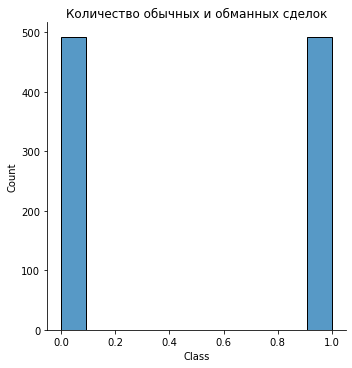

In [30]:
sns.displot(new_df['Class'])
plt.title('Количество обычных и обманных сделок')
plt.show()

In [31]:
# Удалим данные выбросы - ориентируясь на колонки, которые наиболее коррелируют с Class
df_neww = new_df[new_df['Class'] == 1] 
data_new = new_df 
a = []

# Берём выбросы только по наиболее коррелирующим колонкам, по классу == 1: мошенническая сделка 
for k, v in df_neww[['V17', 'V14', 'V12', 'V10', 'V7', 'V3', 'V2', 'V4', 'V11']].items():
    # считаем точки в квантиле 25% от медианы
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1 # интерквартильный размах
        # выбросы находятся за этими точками
        v_col = v[(v <= q1 - 2 * irq) | (v >= q3 + 2 * irq)] #отнимаем 2 межквартильных размаха от 1 квартиля и прибавляем к 3-ему
        if len(v_col) > 0:
            for i in list(v_col.index):
                a.append(i)
data_new = data_new.drop(list(set(a))) # избавляемся от дублей и удаляем соответствующие индексы в датасете 


In [32]:
X = data_new.drop('Class', axis=1)
y = data_new['Class']

# Выделим обучающие и тестовые данные(выборку валидации) для модели 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
acc = []
cv_scores = []

for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print("Accuracy: {}".format(score))
    cv_score = cross_val_score(model,X_train, y_train,cv=5)
    print("Cross Val Score: {}".format(np.mean(cv_score)))
    acc.append(score)
    cv_scores.append(np.mean(cv_score))

LogisiticRegression
Accuracy: 0.9422043010752689
Cross Val Score: 0.9368039180119718
RandomForestClassifier
Accuracy: 1.0
Cross Val Score: 0.9381552693633232
DecisionTreeClassifier
Accuracy: 1.0
Cross Val Score: 0.9126247052421549
KNeighborsClassifier
Accuracy: 0.9529569892473119
Cross Val Score: 0.9368129874841286
Support Vector Classifier
Accuracy: 0.9314516129032258
Cross Val Score: 0.9314257210230364
GaussianNB
Accuracy: 0.9220430107526881
Cross Val Score: 0.9193542535824415
AdaBoostClassifier
Accuracy: 0.9986559139784946
Cross Val Score: 0.9341284237257392
GradientBoostingClassifier
Accuracy: 1.0
Cross Val Score: 0.9394884817703609


Результаты лучшей модели на тестовой выборке:

In [34]:
model_final = RandomForestClassifier()
model_final.fit(X_train, y_train)
y_predict = model_final.predict(X_test)

tn = ['0','1']
print(classification_report(y_test , y_predict , target_names=tn))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        96
           1       0.99      0.84      0.90        91

    accuracy                           0.91       187
   macro avg       0.93      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [203]:
# Проверим на выборке валидации (Оригинальный датасет)
y_predict = model_final.predict(original_X_test)
print(classification_report(original_y_test , y_predict , target_names=tn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.91      0.20        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [212]:
# обучим модель на исходной выборке методом oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()
Xsm_train, ysm_train = smote.fit_resample(original_X_train, original_y_train)

In [213]:
mf =  model_final.fit(Xsm_train, ysm_train) #  используем модель с лучшими параметрами 

C:\Users\SnabUser\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
y_predict = mf.predict(original_X_test)

tn = ['0','1']
print(classification_report(original_y_test , y_predict , target_names=tn))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



В нашем случае Ресэмплинг методом Oversampling обучающих данных для модели с параметрами оптимизированными при обучении на Undersample данных не привёл к улучшению качества модели.

In [97]:
import itertools


# запишем расчёт визуализированной Confusion matrix в функцию 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55401  1463]
 [    8    90]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


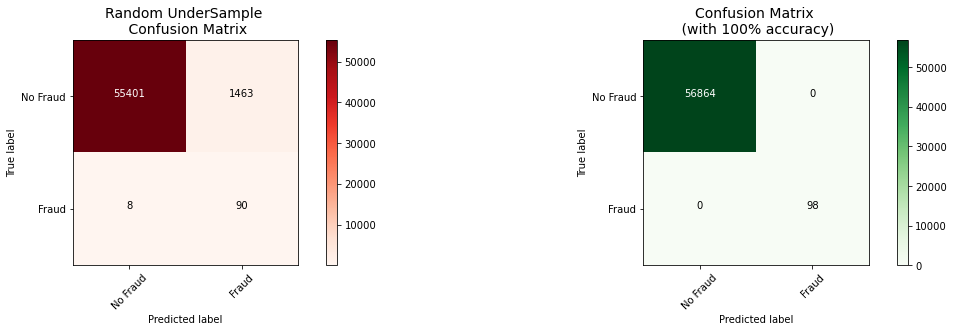

In [215]:
# Отчет о качестве в виде confusion_matrix
undersample_cm = confusion_matrix(original_y_test, y_predict)
actual_cm = confusion_matrix(original_y_test, original_y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)


В данном случае было распознано примерно 90 % из представленных в тестовых данных мошеннических транзакций, при этом имеется значительная доля ложных подозрений на мошенническую среди обычных транзакций. 

### **8. Обучим нейросеть**

In [82]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
import keras.optimizers 
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'), # входной слой 
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax') # 2 класса 
])

In [83]:
undersample_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 18        
Total params: 2,604
Trainable params: 2,604
Non-trainable params: 0
_________________________________________________________________


In [84]:
undersample_model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
undersample_model.fit(X_train, y_train, batch_size=28, epochs=6, validation_split=0.2)

Epoch 1/6
22/22 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 0.9529 - val_loss: 0.2148 - val_accuracy: 0.9463
Epoch 2/6
22/22 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9513 - val_loss: 0.2171 - val_accuracy: 0.9463
Epoch 3/6
22/22 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9529 - val_loss: 0.2117 - val_accuracy: 0.9463
Epoch 4/6
22/22 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.9513 - val_loss: 0.2105 - val_accuracy: 0.9463
Epoch 5/6
22/22 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9513 - val_loss: 0.2207 - val_accuracy: 0.9329
Epoch 6/6
22/22 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9529 - val_loss: 0.2073 - val_accuracy: 0.9463


In [93]:
undersample_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1000us/step - loss: 0.3231 - accuracy: 0.9091


[0.3230745196342468, 0.9090909361839294]

In [94]:
undersample_model.evaluate(original_X_test, original_y_test) 

1781/1781 [==============================] - 1s 689us/step - loss: 0.0883 - accuracy: 0.9784


[0.08832618594169617, 0.9784241914749146]

Точность высокая, но и критерий качества высокий, говорит о низком качестве модели 

In [95]:
undersample_fraud_predictions = np.argmax(undersample_model.predict(original_X_test), axis=-1)  

In [96]:
print(classification_report(original_y_test, undersample_fraud_predictions , target_names=tn))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Confusion matrix, without normalization
[[55642  1222]
 [    7    91]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


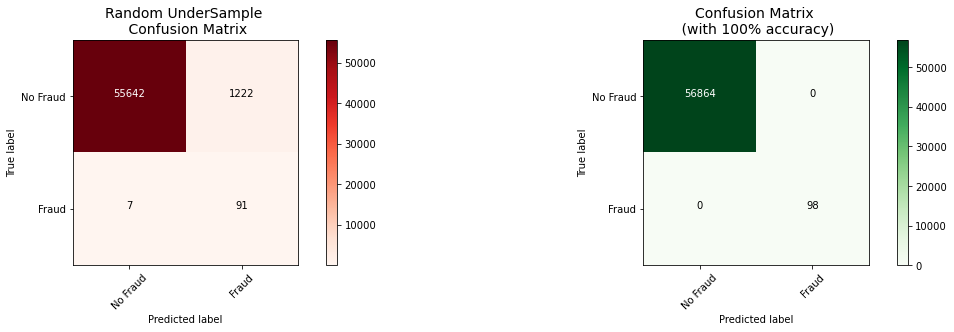

In [98]:
# Построим Confusion matrix, результатирующее распределение классов в оригинальной и спрогнозированной выборке

undersample_cm = confusion_matrix(original_y_test, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_y_test, original_y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

Текущая модель обнаруживает и определяет как обманные около 90% представленных транзакций, но имеется также достаточно высокий процент транзакций, которые ложно определены как обманные, при том, что на самом деле таковыми не являются.

**Применим ML к исходным данным, ресемплированным методом SMOTE**

In [148]:
from keras.layers.core import Dropout

n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [175]:
oversample_model.compile(optimizer= 'nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [184]:
oversample_model.fit(Xsm_train, ysm_train, batch_size=50, epochs=6, validation_split=0.2)

Epoch 1/6
7279/7279 [==============================] - 9s 1ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/6
7279/7279 [==============================] - 9s 1ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0061 - val_accuracy: 0.9986
Epoch 3/6
7279/7279 [==============================] - 9s 1ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.0093 - val_accuracy: 0.9974
Epoch 4/6
7279/7279 [==============================] - 9s 1ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 0.0027 - val_accuracy: 0.9999
Epoch 5/6
7279/7279 [==============================] - 9s 1ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0033 - val_accuracy: 0.9997
Epoch 6/6
7279/7279 [==============================] - 9s 1ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0066 - val_accuracy: 0.9994


In [185]:
oversample_model.evaluate(original_X_test, original_y_test)

1781/1781 [==============================] - 1s 611us/step - loss: 0.0215 - accuracy: 0.9984


[0.02150622010231018, 0.998420000076294]

In [186]:
oversample_fraud_predictions = np.argmax(oversample_model.predict(original_X_test), axis=-1)  

In [187]:
print(classification_report(original_y_test, oversample_fraud_predictions , target_names=tn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.84      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962



Confusion matrix, without normalization
[[56790    74]
 [   16    82]]
Confusion matrix, without normalization
[[56864     0]
 [    0    98]]


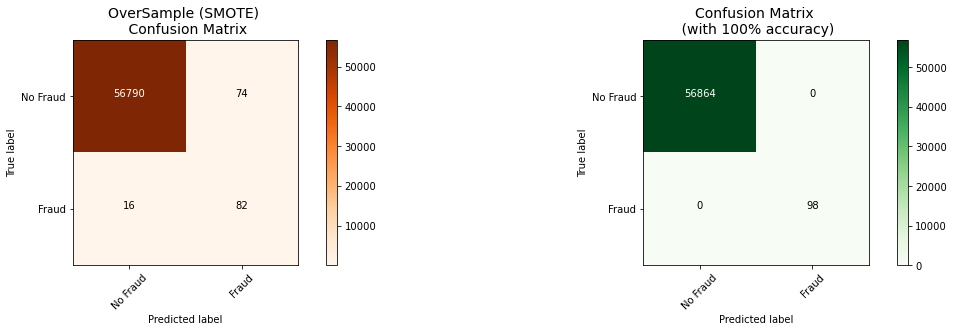

In [210]:
oversample_smote = confusion_matrix(original_y_test, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_y_test, original_y_test)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)


В данном случае сильно выросла доля False Negative, одновременно с этим снизилось число False Positive, таким образом под подозрение и санкции от банка попадёт меньше транзакций, однако около 17% обманных транзакций не будут обнаружены.